In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.2 (python 3.6.9) on 2021-09-20 11:45.


In [3]:
#Read the normalized trajectory data with corresponding branch_ids. 
results= "/data/analysis/preeclampsia_2019/analysis/images/Trophoblast_trajectory_final/Early_villi_pseudotime_genes_final.h5ad"

adata= scv.read(results)

In [6]:
#Subset VCT lineage: 
#after the conversion of the pickel (.pkl) to h5ad- the categories are renamed to numerical labels. 
vct_clusters= ['3', '4', '6'] #vct_clusters= [('S4', 'S3'), ('S5', 'S3'), ('S5', 'S7')]

adata_vct= adata[adata.obs['branch_id_alias'].isin(vct_clusters)]

#adata_vct.obs['cell_type_semifinal_v2'].value_counts()

#Filter the SCT(s), EVT out:
#Subset VCT lineage: TSC, VCT, VCTp or VCT_prol.
vct_clusters_include= ['5', '6', '4']
adata_vct_new = adata_vct[adata_vct.obs['cell_type_semifinal_v2'].isin(vct_clusters_include)]

#Include the corresponding color codes: 
adata_vct_new.uns['cell_type_semifinal_v2_colors']= ['#ff0000', '#00b3b3', '#004d4d']

#Selected lineage markers (leaf genes) that show VCT commitment (fate):
vct_genes= ['DSCAM', 'SLC24A3', 'LGR5', 'TMEM117','SLC16A12', 'COLEC12', 'FRAS1', 'FBN1', 'TP63', 
            'ZBTB7C', 'MEIS2', 'ADAMTS19', 'BMP7', 'DPP4', 'TPK1', 'KANK1', 'DOCK8', 'MME', 'LARGE2', 
            'PARP8', 'MET', 'SMARCA2', 'DOCK9', 'YAP1', 'PBX1', 'FOXP1', 'LINC02267']

Trying to set attribute `.uns` of view, copying.


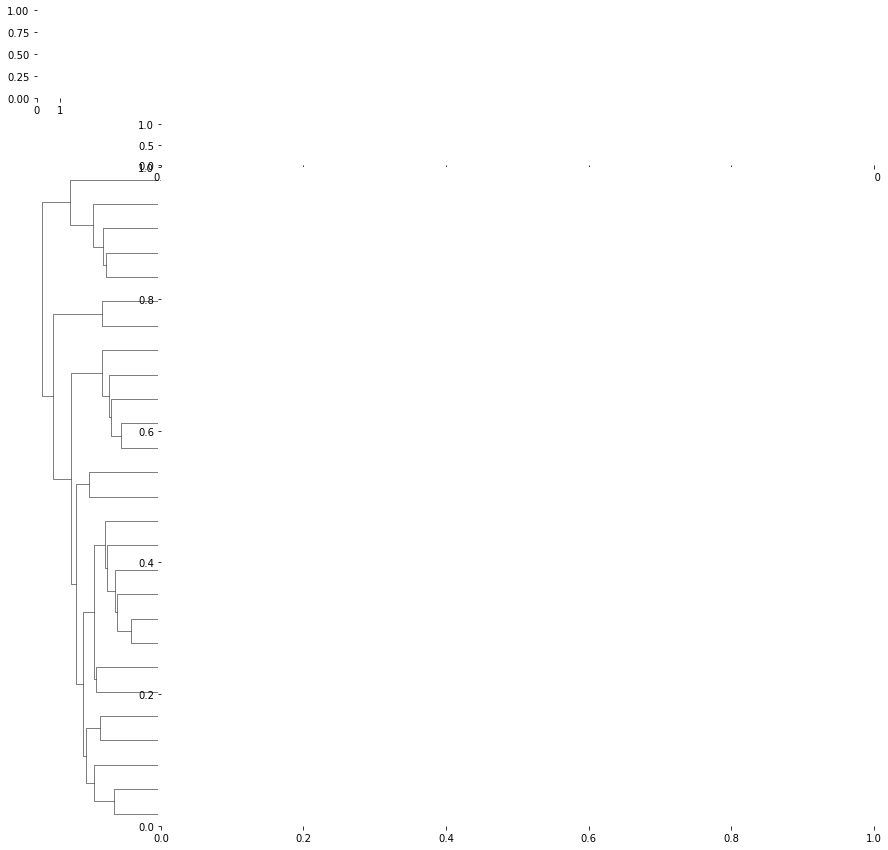

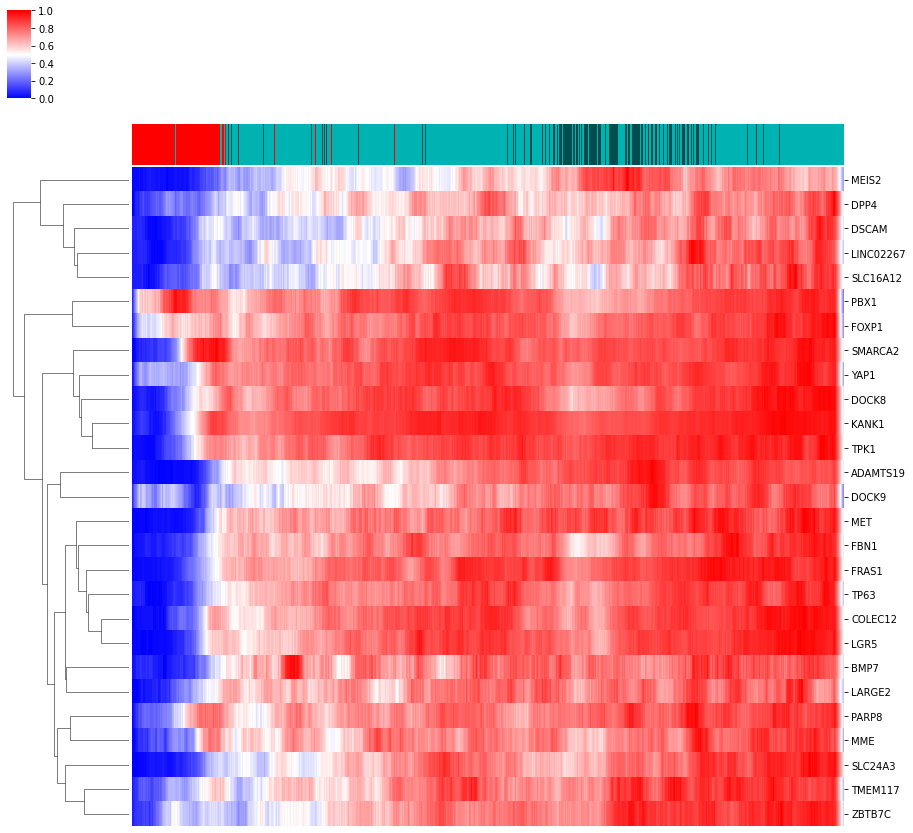

In [7]:
#Order the cells by pseudotime: 
scv.pl.heatmap(adata_vct_new, var_names=vct_genes, sortby='S4_pseudotime', col_color='cell_type_semifinal_v2',
               n_convolve=100, figsize=(15, 15), color_map= 'bwr', row_cluster=True) #save= '_VCT_pseudotimeGenes_v1_2802.pdf'

In [8]:
#Subset EVT lineage: or EVT specific branches. 
evt_clusters= ['3', '1', '0']
adata_evt= adata[adata.obs['branch_id_alias'].isin(evt_clusters)]
#adata_evt.obs['branch_id_alias'].value_counts()

#Selective EVT genes showing invasive extravillous fate/commitment: 
#LAIR2, HLA-G, PLAC8, COL27A1, MYCNUT, DIO2 & NOTUM are celebrated EVT markers. 
evt_genes= ['EPSTI1', 'ANGPT4', 'LAMA4', 'PLAC8', 'LAIR2', 'SCUBE1','DIO2', 'MYCNUT', 'KRT8', 'KRT17', 'GATA6','HLA-G', 
            'TET3', 'KLF6', 'NOTUM', 'MYCNOS', 'COL27A1', 'HAPLN3', 'HEG1', 'GCH1','TGFB1', 'QSOX1', 'SOX4', 
            'COL4A1', 'COL4A2', 'HPGD', 'MMP2', 'BMP2K', 'CD9', 'CDH5', 'JAM3', 'MMP14', 'PLS3', 'IGFBP3', 
           'LRRC32', 'CLNK', 'TNNI2', 'RASGRF2', 'FOSL2', 'FSTL3', 'FLT1', 'LGALS1', 'HTRA4', 'FN1']

#Subset EVT lineage: TSC, VCT, VCTp & EVT.
evt_clusters_include= ['4', '5', '0', '6']
adata_evt_new = adata_evt[adata_evt.obs['cell_type_semifinal_v2'].isin(evt_clusters_include)]
adata_evt_new.obs['cell_type_semifinal_v2'].value_counts()

#Include the corresponding color codes: 
adata_evt_new.uns['cell_type_semifinal_v2_colors']= ['#5c7aff', '#ff0000', '#00b3b3', '#004d4d']

Trying to set attribute `.uns` of view, copying.


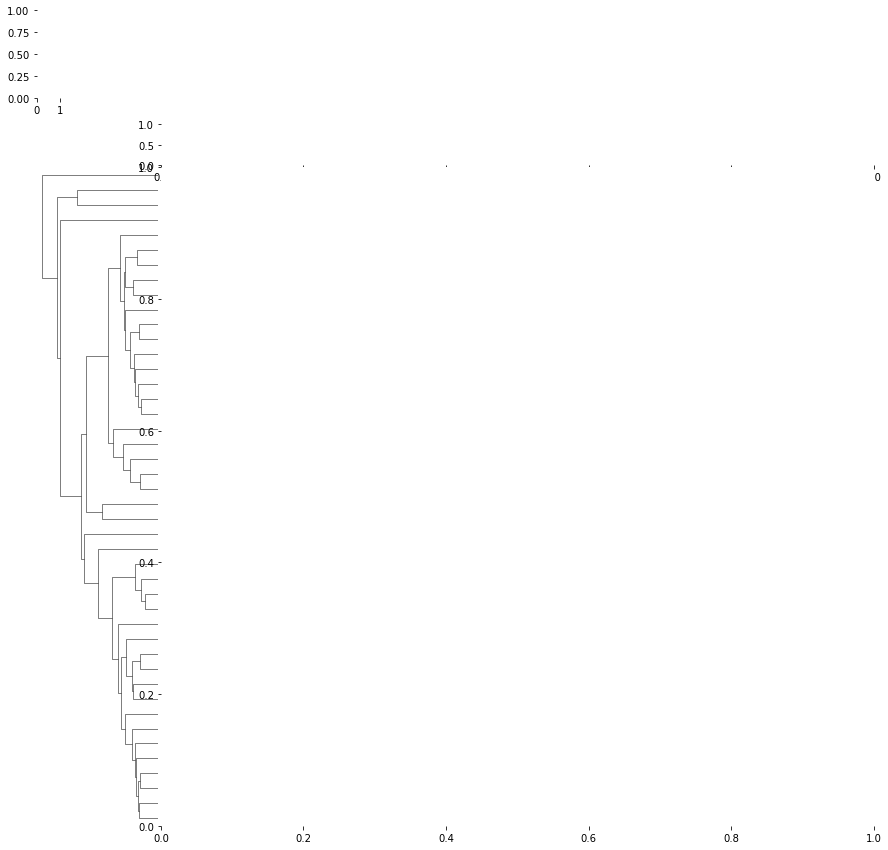

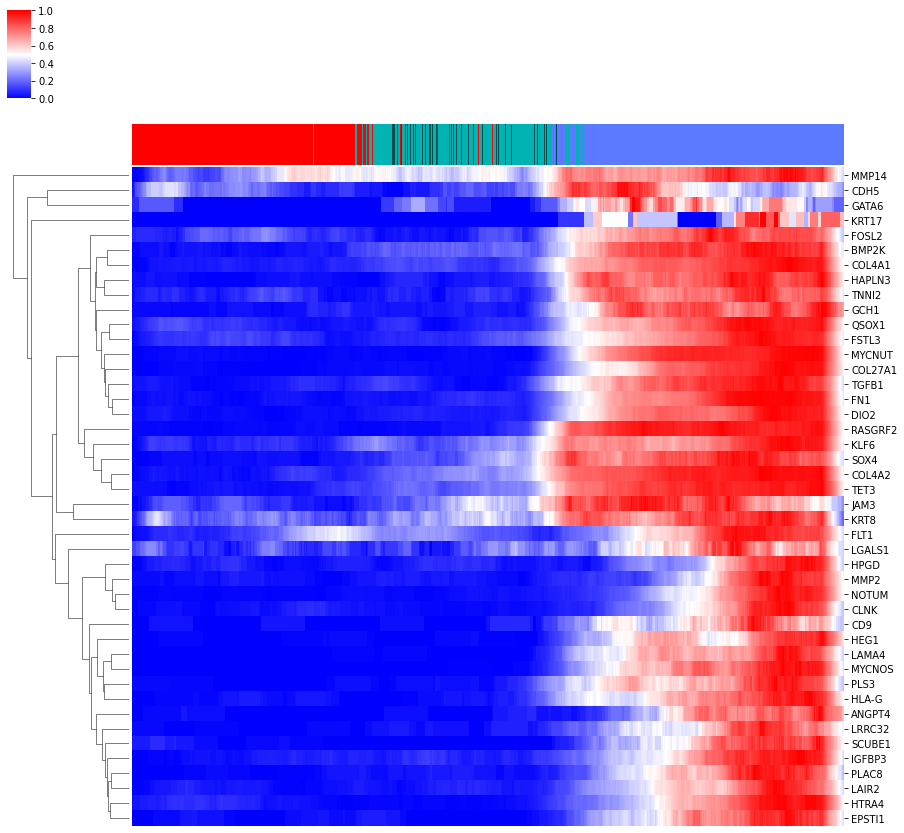

In [9]:
#Order the cells by pseudotime: starts with TSC & culminating into EVT(s) via the VCT. 
#Recapitulates what we know about the EVT differentiation. 
scv.pl.heatmap(adata_evt_new, var_names=evt_genes, sortby='S4_pseudotime', col_color='cell_type_semifinal_v2',
               n_convolve=100, figsize=(15, 15), color_map= 'bwr', row_cluster=True) #save= '_EVT_pseudotimeGenes_v1_2802.pdf'

In [10]:
#Subset SCT lineage: or SCT specific lower branch. 
sct_clusters= ['3', '0', '2']

adata_sct= adata[adata.obs['branch_id_alias'].isin(sct_clusters)]
adata_sct.obs['branch_id_alias'].value_counts()

adata_sct.obs['cell_type_semifinal_v2'].value_counts()

#Include the corresponding SCT lineage color codes: 
adata_sct.uns['cell_type_semifinal_v2_colors']= ['#5c7aff', '#ff99cc', '#cc33ff', '#ff0080', '#ff0000', '#00b3b3', '#004d4d']


#Selective SCT genes showing synctitiotrophoblast fate/commitment: 
#PAPPA2, KISS1, TFPI2, KYNU, CSH1, CSH2, PAPPA, CSHL1, ADAMTS6 are very prominent genes validating SCT fate. 
sct_genes= ['PAPPA2', 'KISS1', 'TFPI2', 'ADGRL3', 'SPTLC3', 'CSGALNACT1', 'LIFR', 'ADAMTS6', 'KYNU',
           'PAPPA', 'CSH1', 'CSH2', 'HOPX', 'SAT1', 'SLC26A7', 'SPATA9', 'DAB2', 'GH2', 'CLDN10', 'LEP',
           'TMEM74B', 'LINC01483', 'KLRD1', 'DERL3', 'CSHL1', 'STEAP4', 'ANGPT2', 'CGB3', 'AGPAT5', 'POSTN',
           'SLC4A4', 'LAMA3', 'KIF6', 'HES1', 'THSD4', 'CD163L1', 'LINC00474', 'DGKI']

Trying to set attribute `.uns` of view, copying.


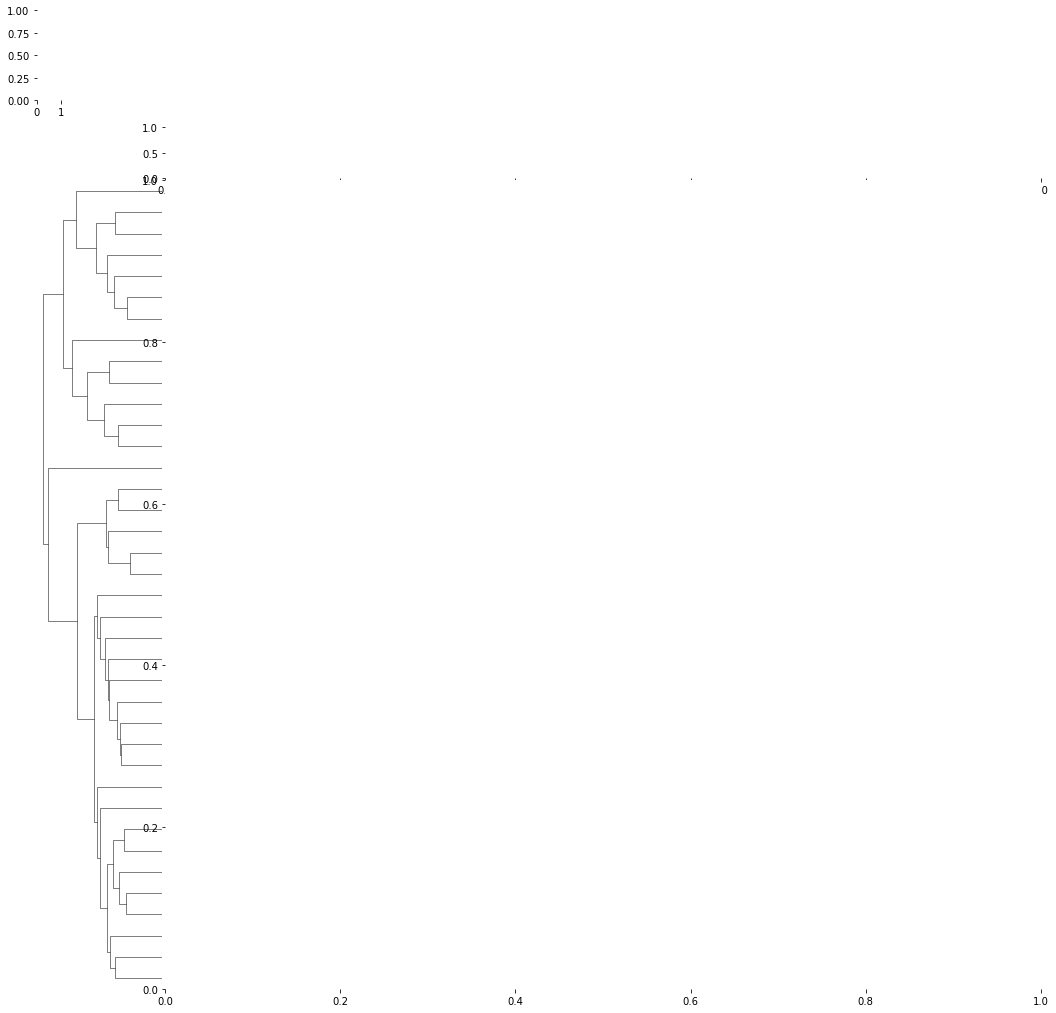

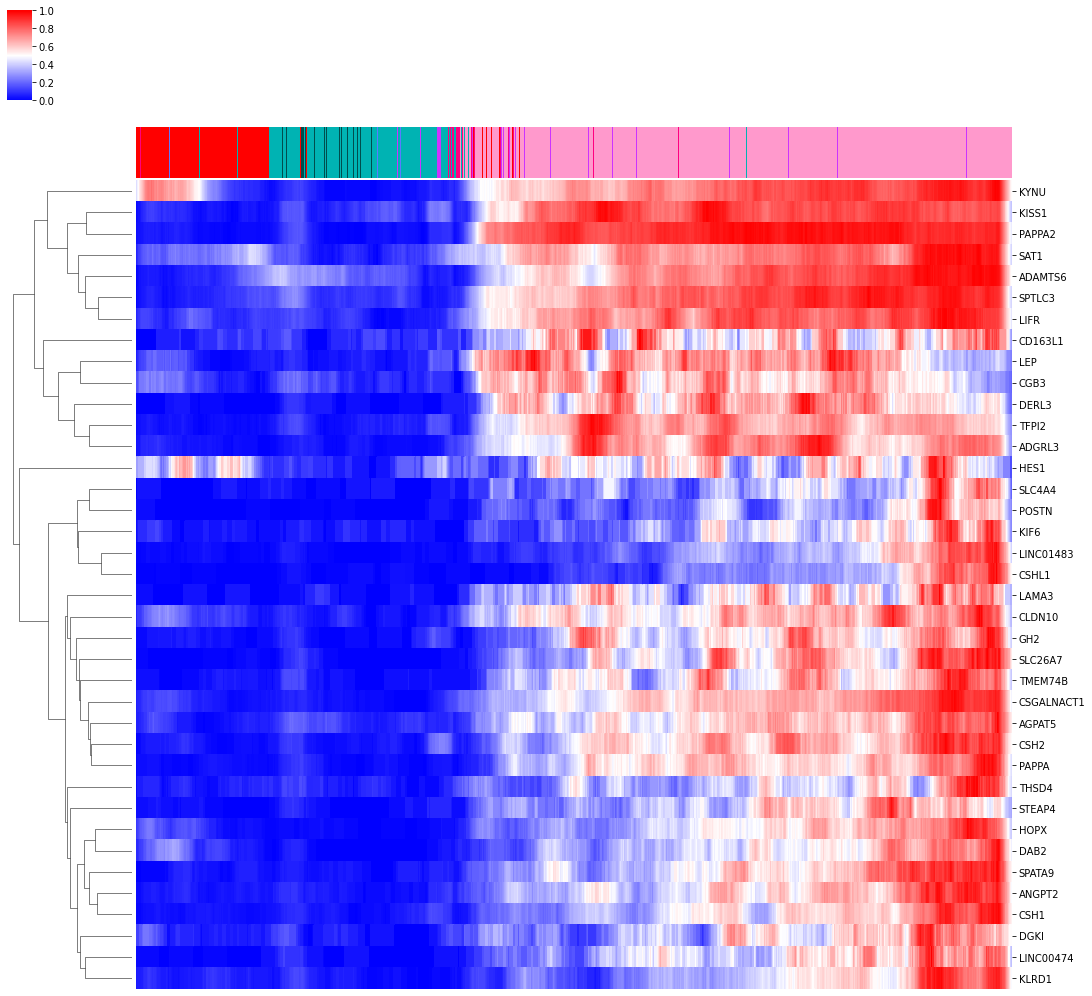

In [11]:
#Order the cells by pseudotime: starts with TSC & culminating into SCT(s) via the VCT. 
#Recapitulates what we know about the SCT differentiation. 
scv.pl.heatmap(adata_sct, var_names=sct_genes, sortby='S4_pseudotime', col_color='cell_type_semifinal_v2',
               n_convolve=100, figsize=(18, 18), color_map= 'bwr', row_cluster=True) #save= '_SCT_pseudotimeGenes_v1_2802.pdf'

In [12]:
sct2_genes= ['PAPPA2', 'KISS1', 'TFPI2', 'ADGRL3', 'SPTLC3', 'CSGALNACT1', 'LIFR', 'ADAMTS6', 'KYNU',
           'PAPPA', 'CSH1', 'HOPX', 'SAT1', 'SPATA9', 'DAB2', 'GH2', 'CLDN10', 'LEP',
           'LINC01483', 'KLRD1', 'DERL3', 'CSHL1', 'STEAP4', 'ANGPT2', 'CGB3', 'POSTN',
           'SLC4A4', 'LAMA3', 'KIF6', 'HES1', 'THSD4', 'CD163L1', 'LINC00474', 'DGKI']